# 190691B
# WIDANAGAMAGE T.R

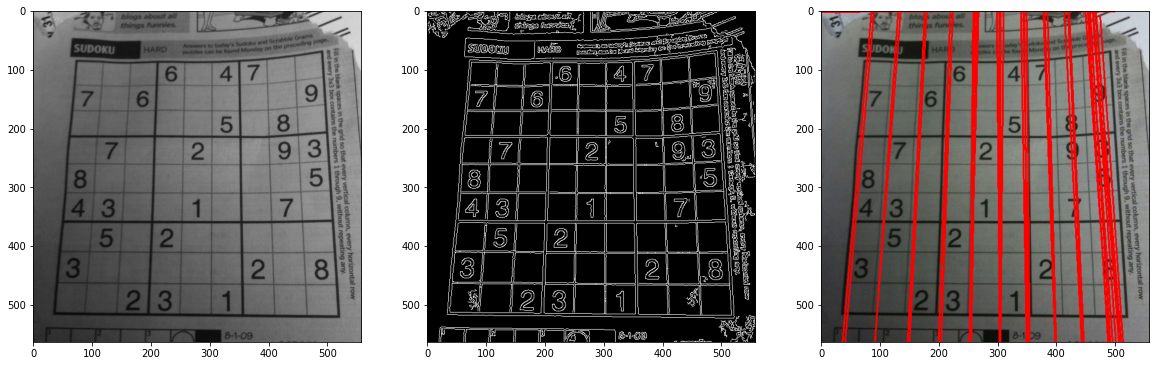

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'sudoku.png', cv.IMREAD_COLOR)
assert im is not None



gray= cv.cvtColor(im, cv.COLOR_RGB2GRAY)
edge = cv.Canny(gray, 0, 60, apertureSize=3)   #50 low intensity treshold, 150 high intensity treshold.
lines = cv.HoughLines(edge, 1, 0.5*np.pi/180, 200)          # row resolution(spatial resolution)  pi/180 angular resolution, 200 votes

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, yo = a*rho, b*rho
    x1, y1 = int(x0 + 500*(-b)), int(x0 + 500*(a))
    x2, y2 = int(x0 - 500*(-b)), int(x0 - 500*(a))
    cv.line(im, (x1, y1), (x2, y2), (0, 0, 255), 2)

# cv.namedWindow("Image", cv.WINDOW_NORMAL)
# cv.imshow("Image", gray)
# cv.waitKey()
# cv.imshow("Image", edge)
# cv.waitKey()
# cv.imshow("Image", im)
# cv.waitKey()
# cv.destroyAllWindows()
gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
edge = cv.cvtColor(edge, cv.COLOR_BGR2RGB)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(gray)
ax[1].imshow(edge)
ax[2].imshow(im)

plt.show()


In [12]:
import cv2 as cv
import numpy as np

img = cv.imread(r'coins.jpg', cv.IMREAD_COLOR)
assert im is not None
gray= cv.cvtColor(im, cv.COLOR_RGB2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50, param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread(r'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
assert temp1 is not None

im_edges = cv.Canny(im, 50, 250)
temp1_edges = cv.Canny(temp1, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions , votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0] / 2. * scale
    halfWidth = temp1.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1= {}, p2 = {}".format(x, y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0, 0, 255))



x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1= (4, 76), p2 = (54, 141)


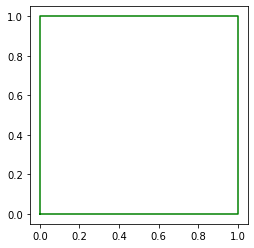

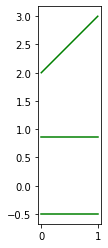

In [32]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 2, 3
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.cos(theta), -s*np.sin(theta), ty]])

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])
fig, ax = plt.subplots()

ax.plot(x,y,color='g')
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()

ax.plot(H, color='g')
ax.set_aspect('equal')
plt.show()